# Exercício para o curso de avaliação de políticas públicas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stat
from scipy.stats import norm

import os

In [2]:
from scipy.stats import t


def calcula_numero_desvios_tstudent_para_confianca(confianca, tamanho_amostra):
    mean = 0
    std = 1
    rv = t(df=(tamanho_amostra-1))
    return rv.interval(confianca)[1]

In [3]:
from scipy.stats import norm


def calcula_numero_desvios_normal_para_confianca(confianca):
    mean = 0
    std = 1
    rv = norm(loc=mean, scale=std)
    return rv.interval(confianca)[1]

In [4]:
def recupera_amostra(populacao, tamanho_amostra):
    return populacao[np.random.randint(0, len(populacao), tamanho_amostra)]

In [5]:
# Define população

mean = 160
std = 20
distribuicao_probabilidades = norm(loc=mean, scale=std)

tamanho_populacao = 100000

populacao = distribuicao_probabilidades.rvs(size=tamanho_populacao, random_state=1)

print('Tamanho população {}, média {}, desvio {}'.format(len(populacao), np.mean(populacao), np.std(populacao)))



Tamanho população 100000, média 160.10506056979364, desvio 19.966585470834723


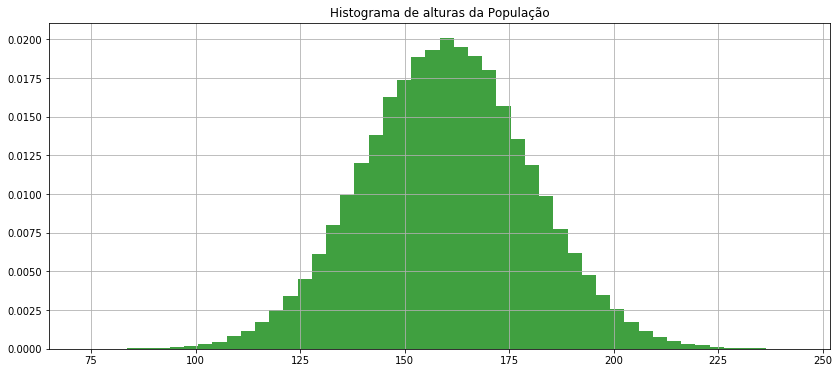

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(14,6))

axs.hist(populacao, density=True, facecolor='g', alpha=0.75, bins=50)
axs.grid(True)
axs.set_title('Histograma de alturas da População')

plt.show()

In [7]:
tamanho_amostra = 100
amostra = recupera_amostra(populacao, tamanho_amostra)
print(amostra)

[159.92591986 158.11755609 155.77665515 160.8235797  173.22530272
 168.71745944 154.63335975 152.51812838 160.59858294 156.18586832
 184.06446197 145.70600626 143.86997378 147.08723595 179.69597881
 190.08230793 176.43854238 167.58556713 182.84211348 149.00596638
 142.62619435 150.26626062 137.54137656 196.73641105 137.74925683
 156.52506464 162.19614539 156.90235122 165.78191722 129.2030695
 145.1764995  164.03718074 172.95708755 173.34006458 125.1364272
 145.85527825 150.46859414 179.54450832 195.20498453 145.2221405
 135.95795808 135.99054868 146.6694052  196.96855404 148.49551209
 151.59062223 184.743303   142.7329108  136.60209208 159.43197717
 150.65970108 155.1655919  166.07404936 157.42693554 138.94506219
 174.51008472 183.40359722 149.8861129  132.02938386 151.20350489
 133.74879261 114.80202492 119.8265436  150.16277675 171.19558028
 155.23733388 174.36707565 142.74052891 182.39148739 162.66830798
 163.68100645 197.03164826 189.48200525 166.75674889 150.44202629
 149.68722711

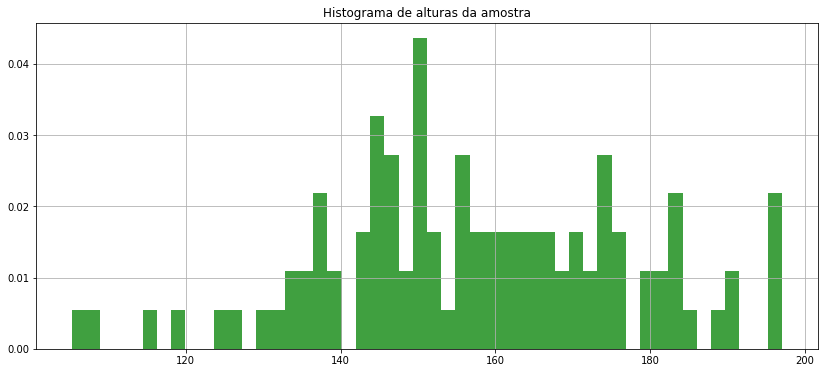

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(14,6))

axs.hist(amostra, density=True, facecolor='g', alpha=0.75, bins=50)
axs.grid(True)
axs.set_title('Histograma de alturas da amostra')

plt.show()

In [9]:
#Dada uma amostra de 100 elementos, calcule a média da altura da populacao considerando confiança de 93%

tamanho_amostra = 100
amostra = recupera_amostra(populacao,tamanho_amostra)
confianca=0.93
#1-Calcule a média da amostra ex. media_amostra = np.mean(amostra) 
media_amostra = np.mean(amostra)
print("  Média da amostra {}".format(media_amostra))
#2-Calcule o desvio da amostra ex. desvio_amostra = np.std(amostra)
desvio_amostra = np.std(amostra)
print("  Desvio da amostra {}".format(desvio_amostra))
#3-Calcule quantos desvios precisará para seu grau de confiânça ex. numero_desvios = calcula_numero_desvios_tstudent_para_confianca(confiança, tamanho_amostra)
numero_desvios = calcula_numero_desvios_tstudent_para_confianca(confianca, tamanho_amostra)
print ("  Número de desvios {}".format(numero_desvios))
#4-Calcule o desvio das amostras ex. desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)
desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)
print ("  Desvio das amostras {}" .format(desvio_amostras))
#5-Calcule a margem de erro ex. margem_erro = numero_desvios*desvio_amostras
margem_erro = numero_desvios*desvio_amostras
print ("  Margem de erro {}" .format (margem_erro))
#6-Calcule o intervalo ex. inferior = media_amostra-margem_erro, superior = media_amostra+margem_erro
inferior = media_amostra-margem_erro
superior = media_amostra+margem_erro
print ("  Intervalo: inferior {}, superior {}".format(inferior, superior))

print(' A média da população estará entre {} e {} com confiança de {}'.format(inferior,superior,confianca))

  Média da amostra 163.51191429254436
  Desvio da amostra 21.852160124966886
  Número de desvios 1.8317202013589133
  Desvio das amostras 2.1852160124966886
  Margem de erro 4.002704314423156
  Intervalo: inferior 159.5092099781212, superior 167.51461860696753
 A média da população estará entre 159.5092099781212 e 167.51461860696753 com confiança de 0.93


In [10]:
# Obtenha uma amostra de 1000 elementos e calcule a média da altura da populacao considerando confiança de 80%
tamanho_amostra = 1000
amostra = recupera_amostra(populacao, tamanho_amostra)
confianca=0.80

media_amostra = np.mean(amostra)
print("  Média da amostra {}".format(media_amostra))

desvio_amostra = np.std(amostra)
print("  Desvio da amostra {}".format(desvio_amostra))

numero_desvios = calcula_numero_desvios_tstudent_para_confianca(confianca, tamanho_amostra)
print ("  Número de desvios {}".format(numero_desvios))

desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)
print ("  Desvio das amostras {}" .format(desvio_amostras))

margem_erro = numero_desvios*desvio_amostras
print ("  Margem de erro {}" .format (margem_erro))

inferior = media_amostra-margem_erro
superior = media_amostra+margem_erro
print ("  Intervalo: inferior {}, superior {}".format(inferior, superior))

print(' A média da população estará entre {} e {} com confiança de {}'.format(inferior,superior,confianca))

  Média da amostra 159.30787367347372
  Desvio da amostra 20.271888992630235
  Número de desvios 1.2823995700373974
  Desvio das amostras 0.6410534169080786
  Margem de erro 0.8220866262139245
  Intervalo: inferior 158.4857870472598, superior 160.12996029968764
 A média da população estará entre 158.4857870472598 e 160.12996029968764 com confiança de 0.8


In [11]:
# Obtenha uma amostra de 100 elementos e calcule a média da altura da populacao considerando confiança de 99%
tamanho_amostra = 100
amostra = recupera_amostra(populacao, tamanho_amostra)
print(amostra)
confianca=0.99
media_amostra = np.mean(amostra)
print("  Média da amostra {}".format(media_amostra))

desvio_amostra = np.std(amostra)
print("  Desvio da amostra {}".format(desvio_amostra))

numero_desvios = calcula_numero_desvios_tstudent_para_confianca(confianca, tamanho_amostra)
print ("  Número de desvios {}".format(numero_desvios))

desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)
print ("  Desvio das amostras {}" .format(desvio_amostras))

margem_erro = numero_desvios*desvio_amostras
print ("  Margem de erro {}" .format (margem_erro))

inferior = media_amostra-margem_erro
superior = media_amostra+margem_erro
print ("  Intervalo: inferior {}, superior {}".format(inferior, superior))

print(' A média da população estará entre {} e {} com confiança de {}'.format(inferior,superior,confianca))

[183.62258316 168.81658836 139.50087247 174.91895693 171.6462128
 134.6346093  153.51884732 178.94858273 149.33352482 139.05660646
 141.81367923 124.43715752 163.86650678 154.91378569 160.64431629
 169.75581239 123.1814011  158.51958983 137.68581685 128.22798676
 152.92657816 198.85907787 189.6490215  180.68235388 197.17472377
 151.85495914 167.5307544  151.51955628 164.84412022 154.5525733
 138.29076947 148.46257816 159.41692217 144.75327341 130.94803028
 158.67939617 155.01345048 160.46658846 143.98267324 193.32451804
 193.17850183 173.20878922 169.49514831 141.82316144 147.73578394
 180.58750754 157.77118738 157.48142086 196.85916362 166.94914955
 150.92292413 193.51503672 168.638333   163.73972208 146.69589815
 116.00288131 165.06065817 151.10751192 173.18551568 145.66711948
 167.55948958 150.26304212 141.17356111 173.06307485 187.06094887
 133.71597935 153.49124647 176.0648807  148.43129579 153.07312328
 171.32898298 123.11251064 167.60597105 157.29242518 162.28271085
 148.7116458